In [2]:
import numpy as np
import pandas as pd 
import statistics
import matplotlib.pyplot as plt 
import itertools

In [2]:
avail = pd.read_csv("FleetAreaConstraints.csv", index_col=0).to_numpy()

In [14]:
n_postcodes, n_fleets = avail.shape

avail_assignments = np.array([itertools.cycle( np.where(avail[i] == 1)[0] ) for i in range(n_postcodes)])
solution = np.random.randint(0, n_fleets, size=(n_postcodes))

solution

array([2, 7, 4, 8, 7, 0, 7, 2, 1, 4, 0, 0, 2, 3, 1, 4, 4, 8, 0, 5, 8, 7,
       6, 0, 5, 6, 6, 0, 3, 5, 3, 6, 4, 7, 6, 1, 4, 0, 2, 2, 5, 2, 3, 7,
       5, 3, 6, 4, 6, 3, 8, 2, 2, 5, 6, 5, 5, 3, 6, 1, 8, 7, 8, 3, 1, 6,
       2, 2, 8, 7, 7, 2])

In [15]:
mut_probs = np.random.rand(n_postcodes)

In [16]:
solution = np.where(mut_probs < 0.3, next(avail_assignments), solution)

TypeError: 'numpy.ndarray' object is not an iterator

In [5]:
x = np.array([1,4,90])
y = np.array([2,2,2])

np.minimum(x, y)

array([1, 2, 2])

In [27]:
demand = pd.read_csv("Demand.csv", index_col=0).to_numpy()

In [28]:
demand.shape

(72, 1)

In [12]:
(avail * demand).shape

(72, 9)

In [4]:
#pd.read_csv("Fleets.csv", index_col=0)#.to_numpy()

In [9]:
prods = pd.read_csv("ParcelsPerH.csv", index_col=0).to_numpy()
prods

array([[  6.9,   4.6,   5. ,   6.1,   3. ,   5. ,   1. ,   5. ,   5. ],
       [  8.7,  11.6,   5. ,   9.2,  10.2,   7. ,   8.5,   8.5,   8.5],
       [  9.6,  12.2,  10.7,  12.9,   7.8,  10.7, 180. ,  10.7,  10.7],
       [  8. ,   7.9,   6.1,   7.7,   7.7,   7.7,   7.2,   7.7,   7.7],
       [  7.8,   8.8,   3.6,   7.1,   6.2,   8.2,   1. ,   7.7,   7.7],
       [  8.2,   6.6,   1. ,  10.2,   7. ,   7.4,   1. ,   7.2,   7.2],
       [  8.7,   7.7,   7.6,   8.3,   1.7,   7.6,   8.2,   7.6,   7.6],
       [ 10.1,  10. ,   1.6,   9.1,   6.4,   9.1,   8.1,   9.1,   9.1],
       [  7.7,   7.4,   9.8,   9.2,   8.7,   8.8,   8.8,   8.8,   8.8],
       [  7.8,   8.5,  24.3,   7.9,   3.4,   7.6,   8.9,   8.9,   8.9],
       [  6. ,   9.6,   9.5,   9.5,   5.3,   9.5,   9.6,   9.5,   9.5],
       [  8. ,   9.7,   9. ,   9. ,   9. ,   9. ,   9. ,   9. ,   9. ],
       [  9.3,   8.5,   6.9,   8. ,   7.4,   8. ,   7.6,   8. ,   8. ],
       [ 10.6,   7.3,   8.2,  10.7,  17.2,  10.7,   9.2,  10.7, 

In [20]:
np.around((avail * demand).astype("float32") / prods, 2)

array([[0.00000e+00, 6.06960e+02, 0.00000e+00, 4.57700e+02, 9.30670e+02,
        0.00000e+00, 2.79200e+03, 0.00000e+00, 0.00000e+00],
       [1.71490e+02, 1.28620e+02, 2.98400e+02, 1.62170e+02, 1.46270e+02,
        2.13140e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.49580e+02, 1.17700e+02, 0.00000e+00, 1.11320e+02, 1.84100e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [3.23750e+02, 3.27850e+02, 4.24590e+02, 0.00000e+00, 3.36360e+02,
        0.00000e+00, 3.59720e+02, 0.00000e+00, 0.00000e+00],
       [1.08154e+03, 9.58640e+02, 2.34333e+03, 1.18817e+03, 1.36065e+03,
        0.00000e+00, 8.43600e+03, 0.00000e+00, 0.00000e+00],
       [5.26100e+02, 6.53640e+02, 4.31400e+03, 4.22940e+02, 6.16290e+02,
        5.82970e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.40570e+02, 4.97790e+02, 0.00000e+00, 4.61810e+02, 2.25471e+03,
        0.00000e+00, 4.67440e+02, 0.00000e+00, 0.00000e+00],
       [7.84360e+02, 7.92200e+02, 4.95125e+03, 8.70550e+02, 1.

In [16]:
df = pd.read_csv("Delayed.csv", index_col=0)

In [30]:
df

,Fleet1,Fleet2,Fleet3,Fleet4,Fleet5,Fleet6,Fleet7,Fleet8,Fleet9
Postcode,,,,,,,,,
1,0.008,0.012,0.012,0.034,0.022,0.012,0.012,0.012,0.012
2,0.007,0.006,0.006,0.009,0.006,0.012,0.006,0.006,0.006
3,0.016,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.001,0.002,0.002,0.002,0.002,0.002,0.009,0.002,0.002
5,0.007,0.007,0.003,0.016,0.001,0.003,0.500,0.003,0.003
...,...,...,...,...,...,...,...,...,...
68,0.006,0.019,0.006,0.006,0.006,0.006,0.006,0.006,0.006
69,0.001,0.002,0.004,0.002,0.002,0.002,0.002,0.002,0.002
70,0.002,0.006,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [29]:
df * 0.5

,Fleet1,Fleet2,Fleet3,Fleet4,Fleet5,Fleet6,Fleet7,Fleet8,Fleet9
Postcode,,,,,,,,,
1,0.0040,0.0060,0.0060,0.0170,0.0110,0.0060,0.0060,0.0060,0.0060
2,0.0035,0.0030,0.0030,0.0045,0.0030,0.0060,0.0030,0.0030,0.0030
3,0.0080,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
4,0.0005,0.0010,0.0010,0.0010,0.0010,0.0010,0.0045,0.0010,0.0010
5,0.0035,0.0035,0.0015,0.0080,0.0005,0.0015,0.2500,0.0015,0.0015
...,...,...,...,...,...,...,...,...,...
68,0.0030,0.0095,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030
69,0.0005,0.0010,0.0020,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010
70,0.0010,0.0030,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010


In [25]:
delays = np.unique(np.reshape(matrix, matrix.size))

In [26]:
delays = np.sort(delays)[::-1]
delays

array([1.   , 0.5  , 0.4  , 0.333, 0.25 , 0.2  , 0.167, 0.145, 0.125,
       0.093, 0.074, 0.063, 0.057, 0.052, 0.044, 0.042, 0.04 , 0.034,
       0.033, 0.032, 0.028, 0.026, 0.024, 0.022, 0.021, 0.019, 0.018,
       0.017, 0.016, 0.015, 0.014, 0.013, 0.012, 0.011, 0.01 , 0.009,
       0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.   ])

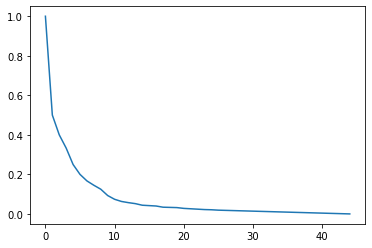

In [27]:
plt.plot(delays)

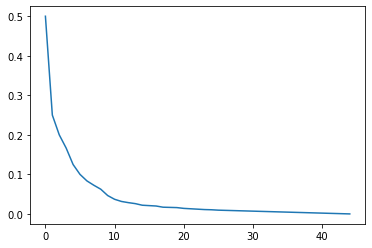

In [28]:
plt.plot(delays * 0.5)

In [22]:
x = np.asarray([[1, 0], 
                [0, 0],
                [1, 0]])
y = np.array([3,4,5])
#y.resize((3,1))


In [23]:
x.shape, y.shape

((3, 2), (3,))

In [26]:
(x.T * y).T

array([[3, 0],
       [0, 0],
       [5, 0]])